In [1]:
import pandas as pd
import numpy as np

In [2]:
auctions = pd.read_csv('auctions.csv.gzip', compression = 'gzip', dtype = {'auction_type_id':'object', 'country': np.float32, 'date': 'object', 'device_id': np.float32, 'platform' :'category', 'ref_type_id':'category', 'source_id':'category'})

In [3]:
del auctions['country']

In [4]:
del auctions['auction_type_id']

In [5]:
auctions.loc[:,'date'] = pd.to_datetime(auctions['date'], errors = 'coerce')

In [6]:
auctions_reduced = auctions[['device_id', 'platform']]

In [7]:
android = auctions_reduced[auctions_reduced['platform'] == '1']
apple = auctions_reduced[auctions_reduced['platform'] == '2']

In [8]:
android['device_id'].value_counts().count()

159614

In [10]:
apple['device_id'].value_counts().count()

46839

In [11]:
import matplotlib.pyplot as plt

<Container object of 2 artists>

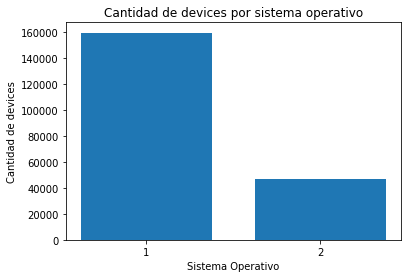

In [33]:
x = [1, 1.4]
height = [android['device_id'].value_counts().count(), apple['device_id'].value_counts().count()]
width = 0.3
plt.title('Cantidad de devices por sistema operativo')
plt.xlabel('Sistema Operativo')
plt.ylabel('Cantidad de devices')
plt.bar(x,height, width, align = 'center', tick_label = sorted(set(auctions['platform'].values)))

['1', '2']